### <i> Performance Optimization in Multi Machine Blockchain Systems A Comprehensive Benchmarking Analysis 25310 </i>
### <i> Import Library Files </i>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### <i> Load The Dataset </i>

In [46]:
df = pd.read_csv("MMBPD.csv")
df

,Set Send Rates,Send Rates,Block Size,Min Latency,Avg Latency,Max Latency,Throughput,CPU Usage (%)
0,10.0,10.0,10.0,0.03,0.31,0.60,10.0,16.57
1,10.0,10.0,15.0,0.04,0.60,2.06,9.9,16.61
2,10.0,10.0,20.0,0.04,0.82,1.64,10.0,16.64
3,10.0,10.0,25.0,0.04,1.14,2.10,9.9,16.67
4,10.0,10.0,30.0,0.05,1.10,2.16,9.8,16.70
...,...,...,...,...,...,...,...,...
3076,200.0,165.2,380.0,0.22,0.86,2.06,123.6,20.32
3077,200.0,174.5,385.0,0.37,0.81,1.42,158.5,20.35
3078,200.0,172.4,390.0,0.30,0.93,1.74,159.9,20.37
3079,200.0,169.2,395.0,0.19,0.81,1.47,161.9,20.40


### <i> Load The Dataset </i>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set Send Rates  3081 non-null   float64
 1   Send Rates      3081 non-null   float64
 2   Block Size      3081 non-null   float64
 3   Min Latency     3081 non-null   float64
 4   Avg Latency     3081 non-null   float64
 5   Max Latency     3081 non-null   float64
 6   Throughput      3081 non-null   float64
 7   CPU Usage (%)   3081 non-null   float64
dtypes: float64(8)
memory usage: 192.7 KB


In [48]:
df.describe()

,Set Send Rates,Send Rates,Block Size,Min Latency,Avg Latency,Max Latency,Throughput,CPU Usage (%)
count,3081.000000,3081.000000,3081.00000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,105.000000,102.409770,205.00000,0.143736,0.776566,1.815034,90.783642,18.392016
std,56.282278,52.779922,114.03605,0.069781,0.309646,0.567710,45.290648,1.079603
min,10.000000,10.000000,10.00000,0.030000,0.100000,0.210000,9.800000,16.570000
25%,55.000000,55.200000,105.00000,0.090000,0.630000,1.340000,54.100000,17.510000
50%,105.000000,104.800000,205.00000,0.130000,0.730000,2.080000,96.900000,18.160000
75%,155.000000,150.600000,305.00000,0.180000,0.950000,2.170000,121.800000,19.330000
max,200.000000,184.400000,400.00000,0.430000,11.130000,18.840000,173.900000,20.430000


In [49]:
# Rename columns if needed
df.columns = [col.strip() for col in df.columns]  # remove whitespace

# ---------------------------
# Feature Engineering
# ---------------------------
df['Latency Range'] = df['Max Latency'] - df['Min Latency']
df['Efficiency'] = df['Throughput'] / df['Send Rates']
df['CPU Efficiency'] = df['Throughput'] / df['CPU Usage (%)']


### <i> Data Visulization And Analysis </i>

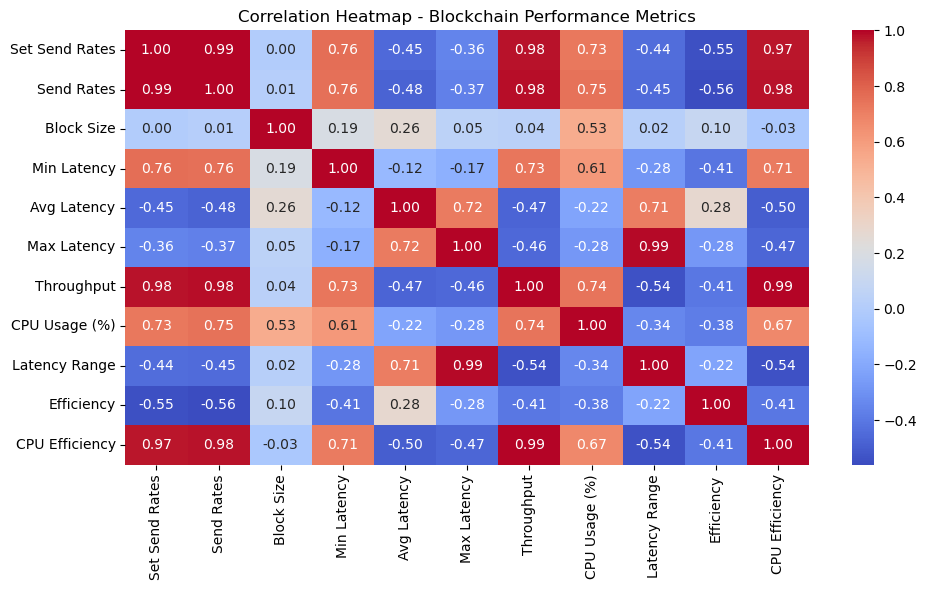

In [50]:
# Correlation Heatmap
# ---------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Blockchain Performance Metrics')
plt.tight_layout()
plt.show()

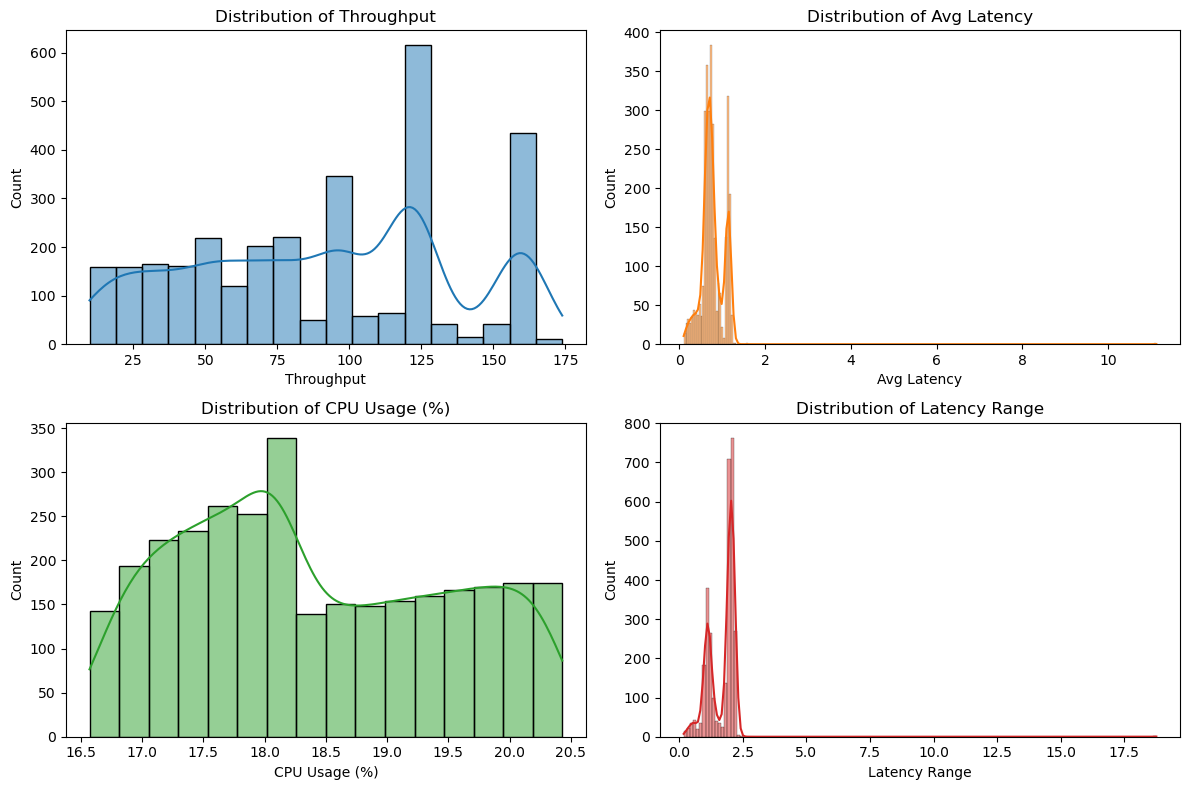

In [51]:
# Distribution of Key Metrics
# ---------------------------
metrics = ['Throughput', 'Avg Latency', 'CPU Usage (%)', 'Latency Range']
plt.figure(figsize=(12, 8))
for i, col in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color=sns.color_palette('tab10')[i])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

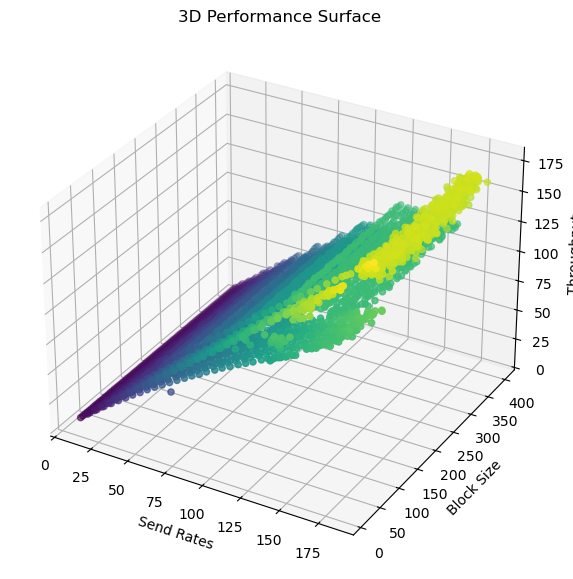

In [52]:
# 3D Plot: Send Rates vs Block Size vs Throughput
# ---------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Send Rates'], df['Block Size'], df['Throughput'], c=df['Throughput'], cmap='viridis', s=20)
ax.set_xlabel('Send Rates')
ax.set_ylabel('Block Size')
ax.set_zlabel('Throughput')
ax.set_title('3D Performance Surface')
plt.show()

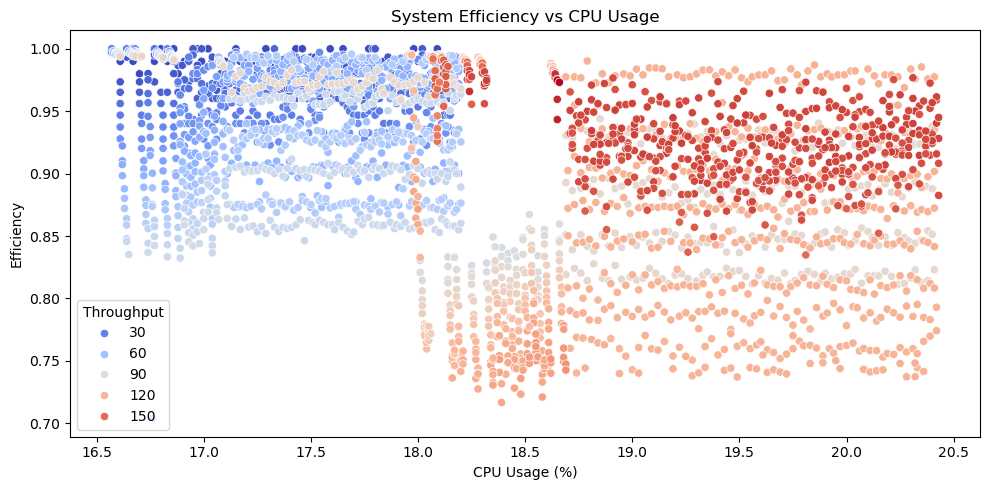

In [53]:
# Line Plot: Efficiency vs CPU Usage (%)
# ---------------------------
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CPU Usage (%)', y='Efficiency', hue='Throughput', palette='coolwarm')
plt.title('System Efficiency vs CPU Usage')
plt.tight_layout()
plt.show()

In [54]:
# Plotly Interactive: Latency vs Send Rate
# ---------------------------
fig = px.scatter(df, x='Send Rates', y='Avg Latency',
                 color='Block Size', size='Throughput',
                 title='Interactive: Send Rates vs Avg Latency')
fig.show()


### <i> Data Preprocessing </i>

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df.columns = [col.strip() for col in df.columns]  # Clean column names

# ---------------------------
# Feature Engineering
# ---------------------------
df['Latency Range'] = df['Max Latency'] - df['Min Latency']
df['Efficiency'] = df['Throughput'] / df['Send Rates']
df['CPU Efficiency'] = df['Throughput'] / df['CPU Usage (%)']

# ---------------------------
# Create Classification Target
# ---------------------------
# Classify 'Throughput' into 3 categories: Low, Medium, High
df['Performance_Class'] = pd.qcut(df['Throughput'], q=3, labels=['Low', 'Medium', 'High'])

# ---------------------------
# Drop Unused Columns (if needed)
# ---------------------------
df.drop(columns=['Min Latency', 'Max Latency', 'Throughput'], inplace=True)

# ---------------------------
# Encode Target Labels
# ---------------------------
le = LabelEncoder()
df['Performance_Class'] = le.fit_transform(df['Performance_Class'])  # Low: 0, Medium: 1, High: 2

# ---------------------------
# Features and Target Split
# ---------------------------
X = df.drop('Performance_Class', axis=1)
y = df['Performance_Class']

# ---------------------------
# Normalize Feature Set
# ---------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Print Summary
# ---------------------------
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print("Target Class Distribution (Train):")
print(pd.Series(y_train).value_counts())


Training Samples: 2464
Testing Samples: 617
Target Class Distribution (Train):
Performance_Class
1    829
0    820
2    815
Name: count, dtype: int64


### <i> Modeling </i>
### <i> Random Forest Classifier </i>

🔍 Random Forest Classifier
Accuracy: 0.9675850891410048
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       205
           1       1.00      1.00      1.00       208
           2       0.96      0.94      0.95       204

    accuracy                           0.97       617
   macro avg       0.97      0.97      0.97       617
weighted avg       0.97      0.97      0.97       617



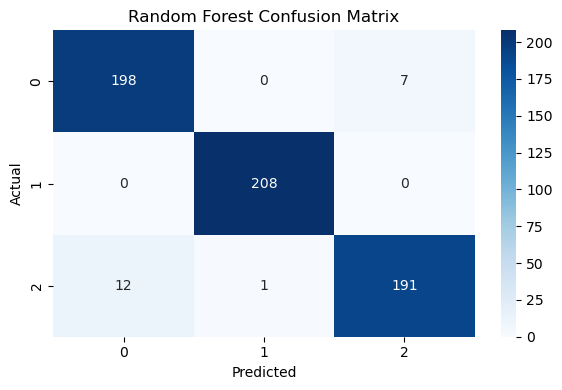

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluation
print("🔍 Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### <i> SVC </i>

🔍 Support Vector Machine
Accuracy: 0.93354943273906
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       205
           1       0.99      0.98      0.98       208
           2       0.97      0.82      0.89       204

    accuracy                           0.93       617
   macro avg       0.94      0.93      0.93       617
weighted avg       0.94      0.93      0.93       617



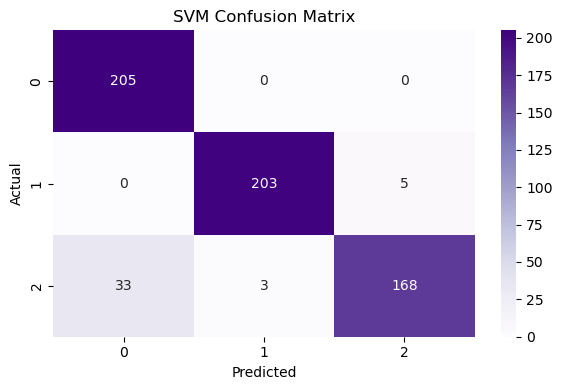

In [57]:
from sklearn.svm import SVC

# Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predict
svm_preds = svm_model.predict(X_test)

# Evaluation
print("🔍 Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### <i> Gradient Boosting Classifier </i>

🔍 Gradient Boosting Classifier
Accuracy: 0.9562398703403565
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       205
           1       0.99      0.99      0.99       208
           2       0.95      0.92      0.93       204

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



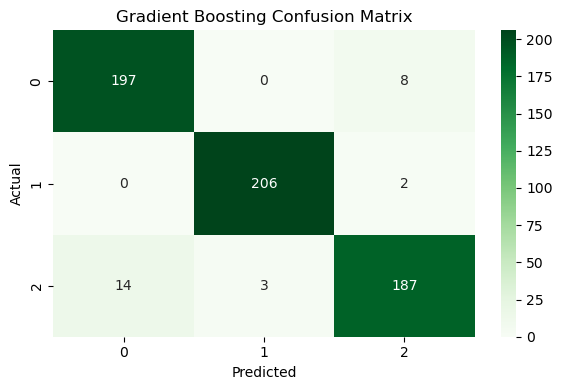

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
gb_preds = gb_model.predict(X_test)

# Evaluation
print("🔍 Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, gb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### <i> Comparison Of All Models </i>

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Dictionary to hold model results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Helper function to collect metrics
def evaluate_model(name, y_true, y_pred):
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_true, y_pred))
    results['Precision'].append(precision_score(y_true, y_pred, average='macro'))
    results['Recall'].append(recall_score(y_true, y_pred, average='macro'))
    results['F1 Score'].append(f1_score(y_true, y_pred, average='macro'))

# Evaluate all models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svm_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.967585   0.967573  0.967376  0.967356
1                SVM  0.933549   0.939293  0.933164  0.932477
2  Gradient Boosting  0.956240   0.956178  0.956009  0.955931


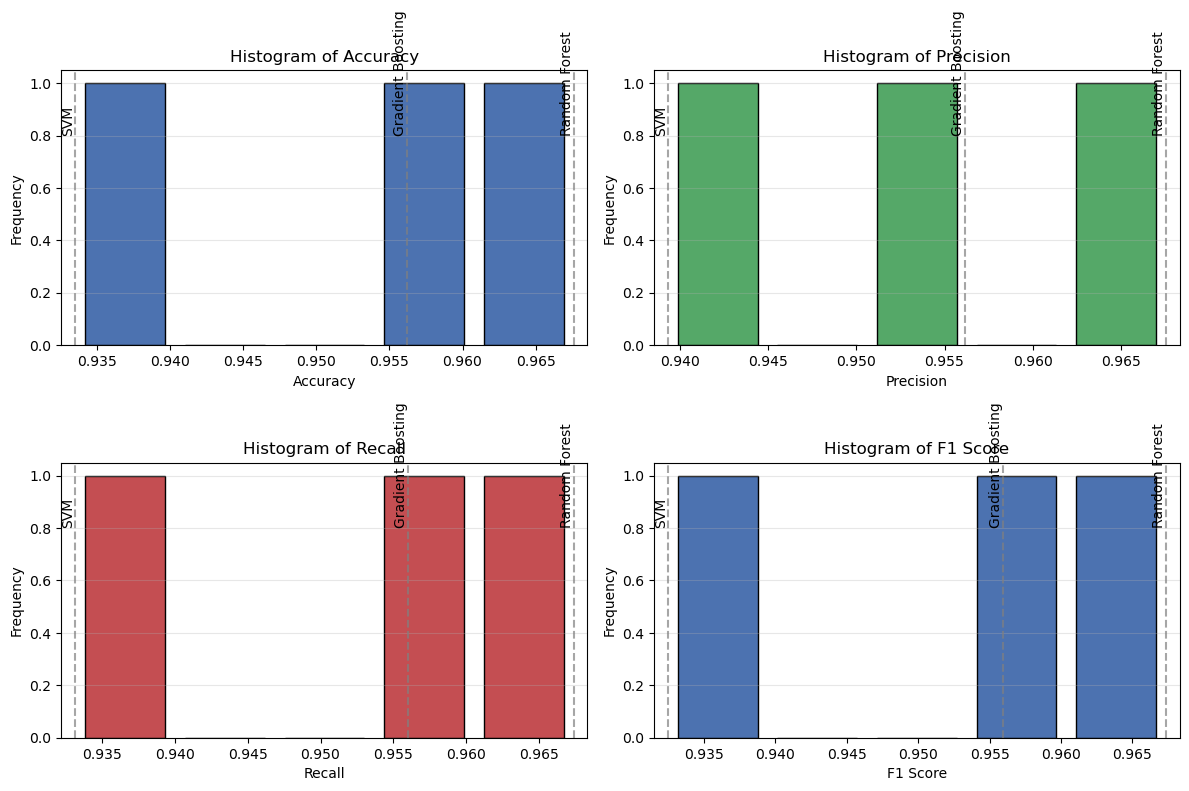

In [60]:
import matplotlib.pyplot as plt

# Prepare the data
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#4c72b0', '#55a868', '#c44e52']

# Plot histograms for each metric
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.hist(results_df[metric], bins=5, color=colors[i % len(colors)], edgecolor='black', rwidth=0.8)
    plt.title(f'Histogram of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    for x, val in zip(results_df[metric], models):
        plt.axvline(x=x, color='gray', linestyle='--', alpha=0.7)
        plt.text(x, 0.8, val, rotation=90, va='bottom', ha='right')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
